In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [3]:
# 데이터 로드
df = pd.read_pickle('LSWMD.pkl')

# Task 0: Exploratory Data Analysis

In [4]:
# 데이터 크기 확인 
df.shape

(811457, 6)

In [5]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
waferMap          811457 non-null object
dieSize           811457 non-null float64
lotName           811457 non-null object
waferIndex        811457 non-null float64
trianTestLabel    811457 non-null object
failureType       811457 non-null object
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [7]:
## labeling 여부
N_labled = 0
for i in range(len(df.failureType)):
    if len(df.failureType[i]) != 0: # labeled
        N_labled += 1

# labeled 비율
print('N of labeled = ', N_labled, '  label 비율 = ', N_labled/len(df.failureType)*100, '%')
print('N of unlabeled = ', len(df.failureType)-N_labled, '  unlabel 비율 = ', 100-N_labled/len(df.failureType)*100, '%')

N of labeled =  172950   label 비율 =  21.313513839920045 %
N of unlabeled =  638507   unlabel 비율 =  78.68648616007995 %


In [8]:
## 불량 type
failureType = []
for i in range(len(df.failureType)):
    if len(df.failureType[i]) != 0: # labeled
        if df.failureType[i][0][0] != 'none':
            failureType.append(df.failureType[i])

In [9]:
# 불량 type 수
failureType = np.unique(failureType)
print('불량 type: ', failureType)

불량 type:  ['Center' 'Donut' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random'
 'Scratch']


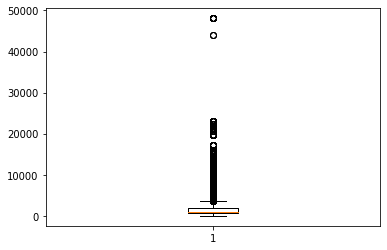

In [10]:
plt.boxplot(df.dieSize)
plt.show()

In [12]:
## outlier 제거
# 만약 정상(1)이 없다면 outlier
outlier_idx = []
for i in range(len(df.waferMap)):
    if (df.waferMap[i] == 1).sum() == 0:
        outlier_idx.append(i)

In [13]:
len(outlier_idx)

339

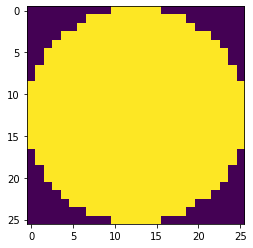

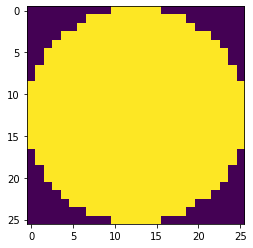

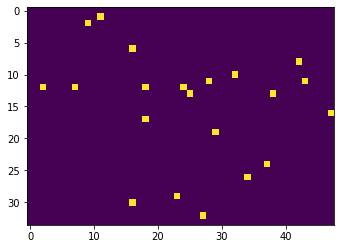

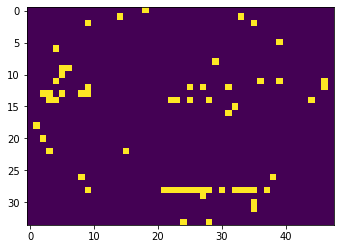

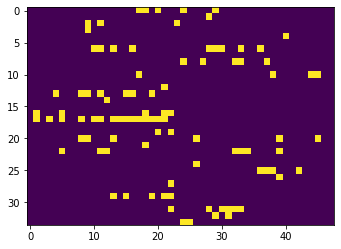

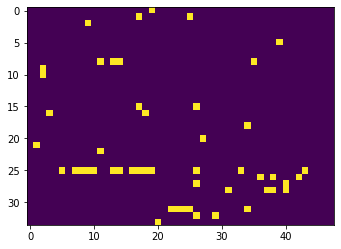

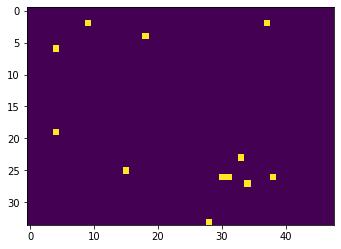

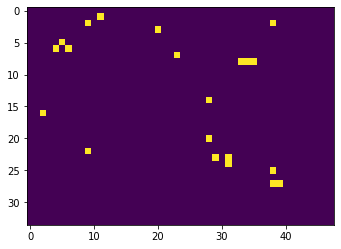

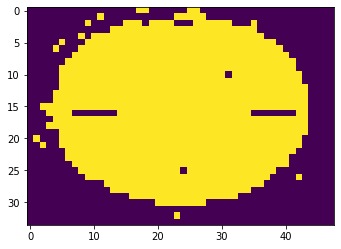

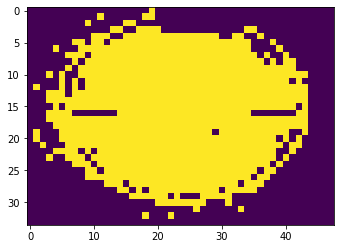

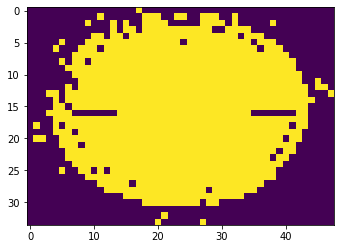

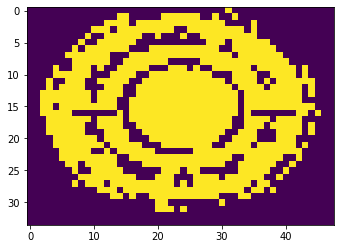

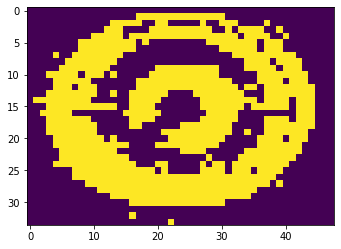

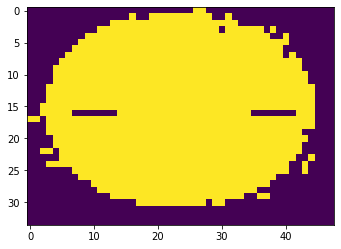

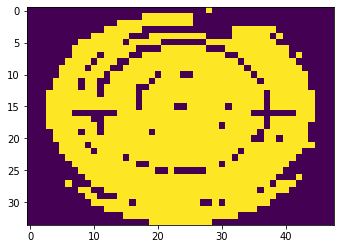

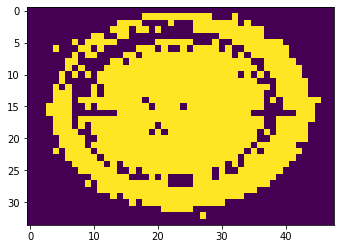

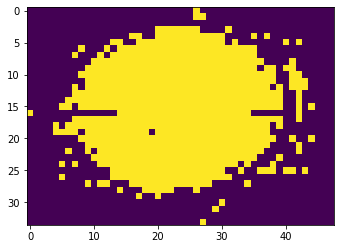

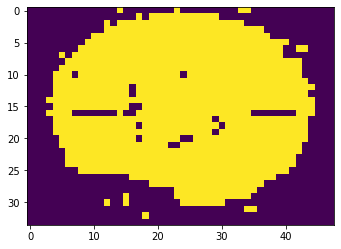

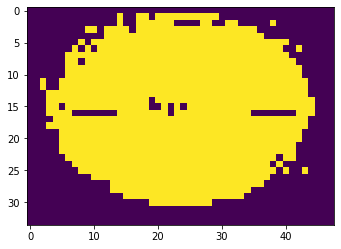

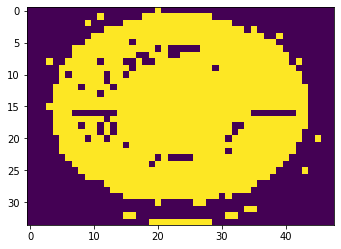

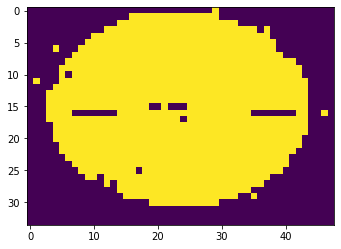

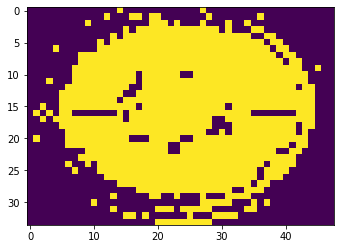

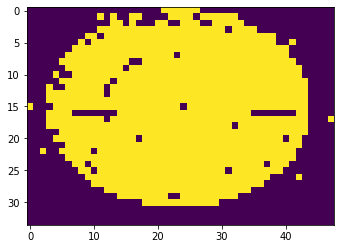

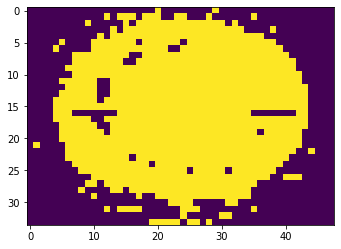

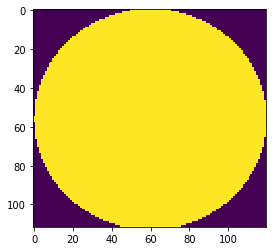

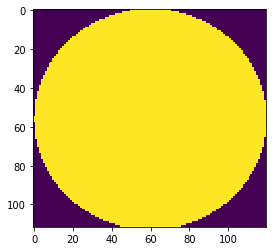

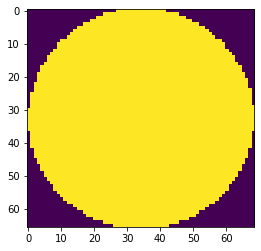

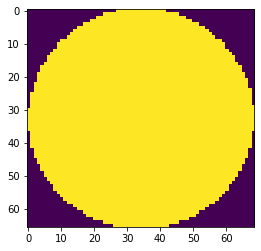

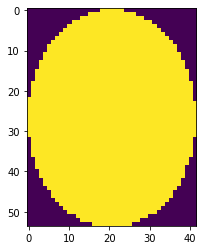

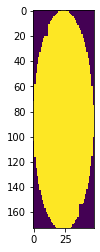

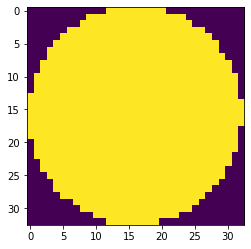

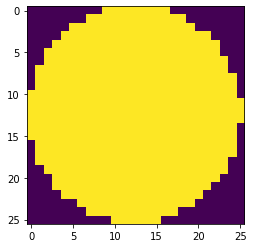

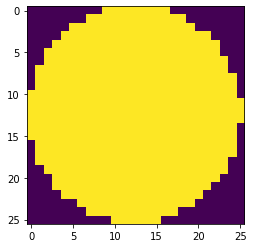

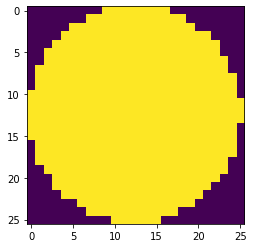

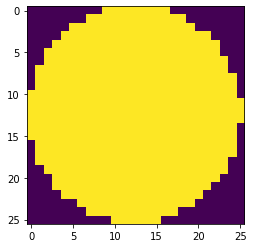

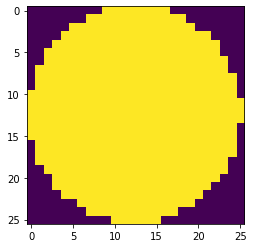

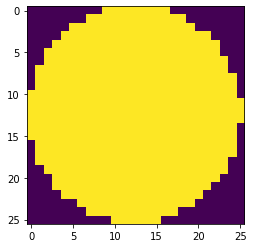

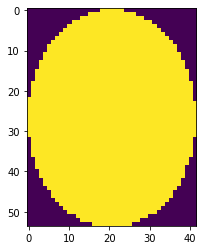

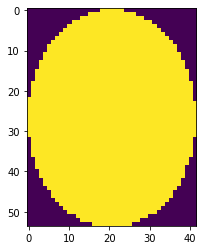

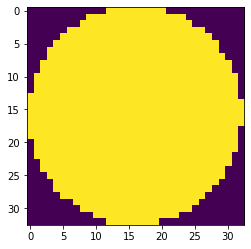

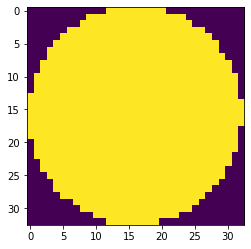

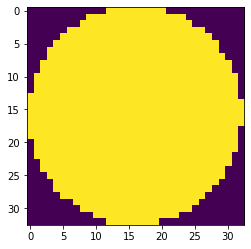

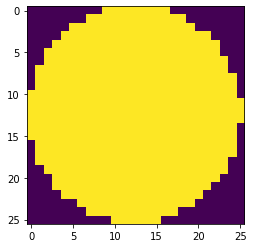

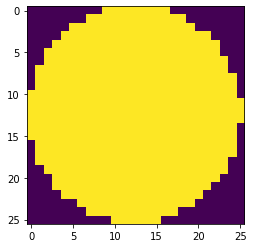

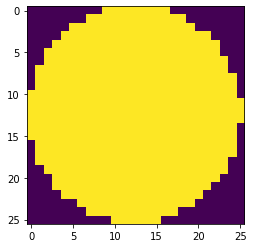

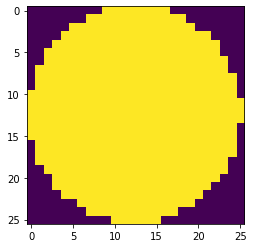

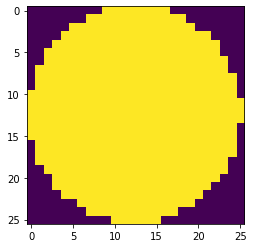

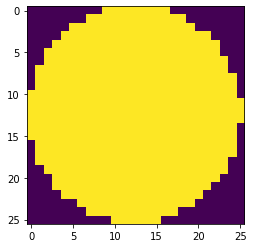

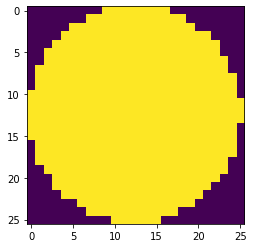

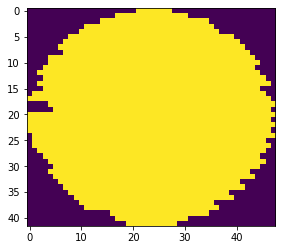

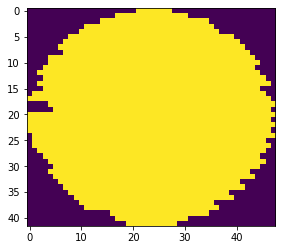

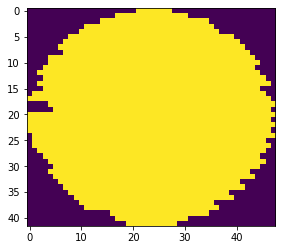

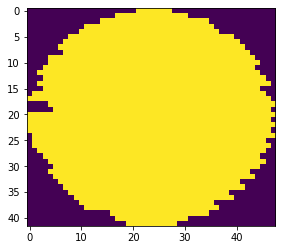

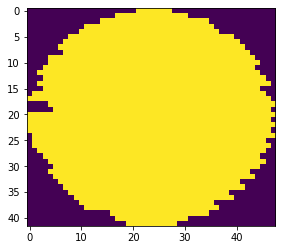

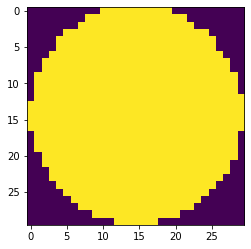

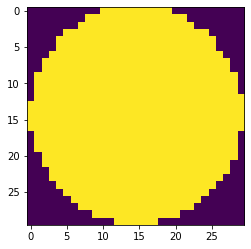

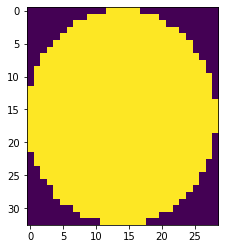

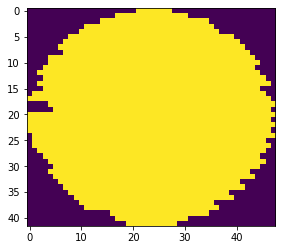

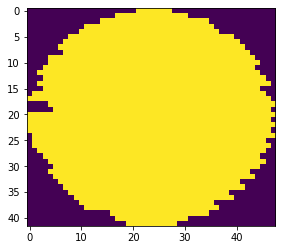

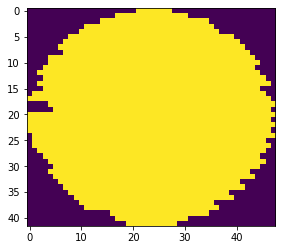

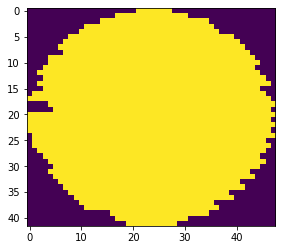

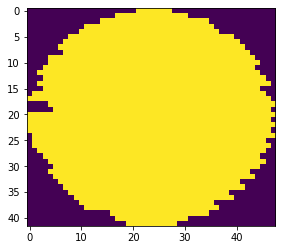

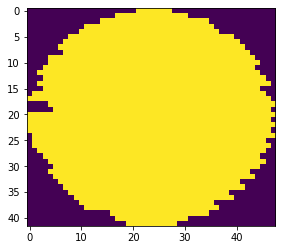

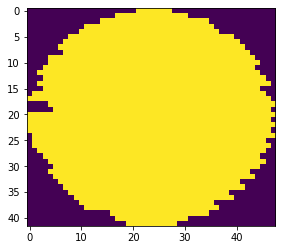

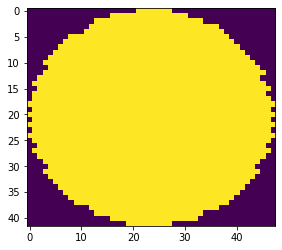

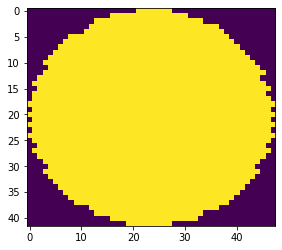

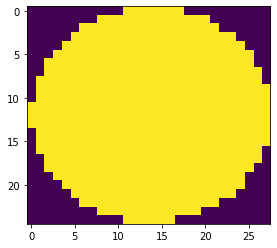

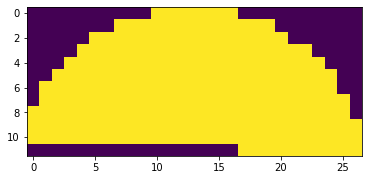

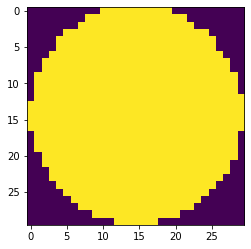

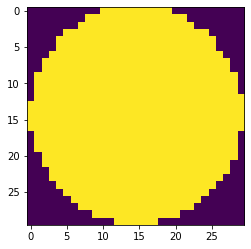

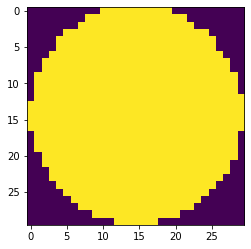

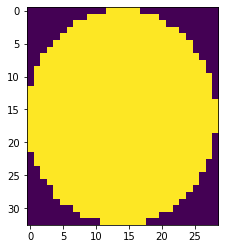

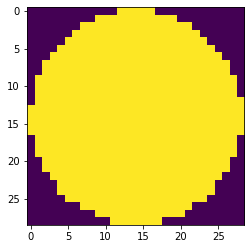

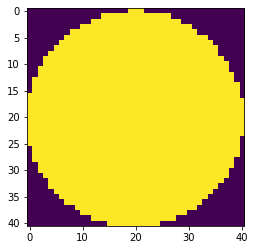

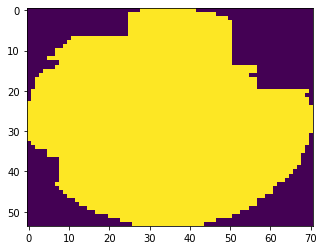

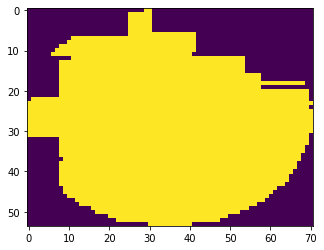

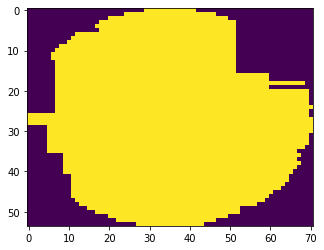

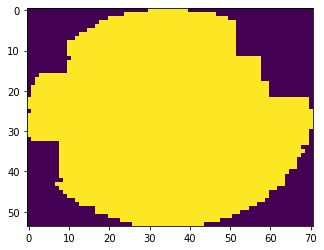

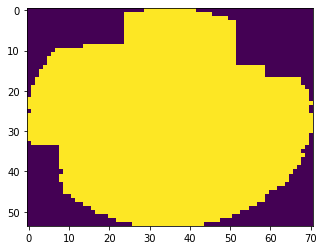

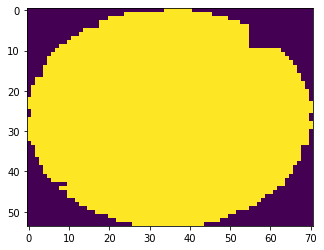

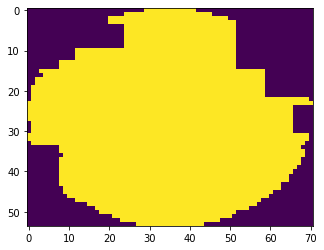

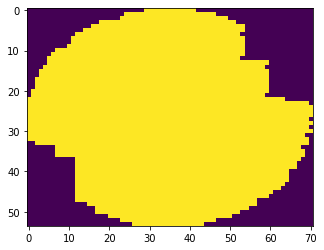

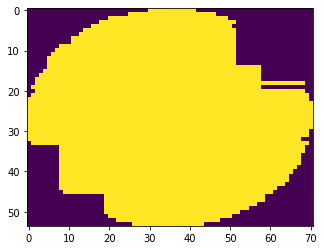

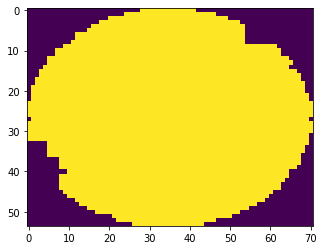

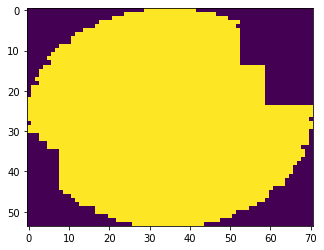

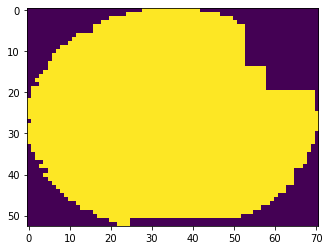

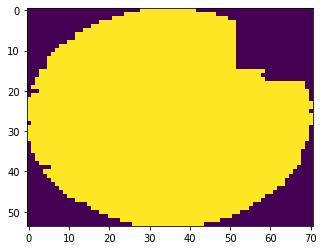

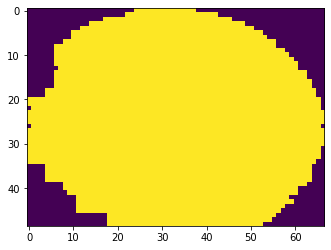

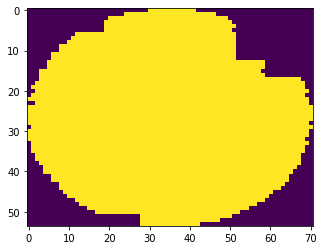

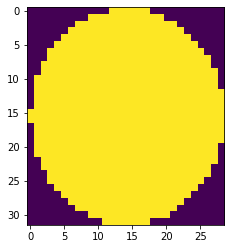

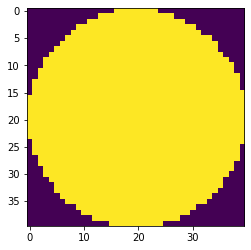

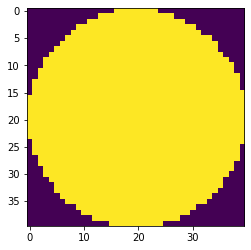

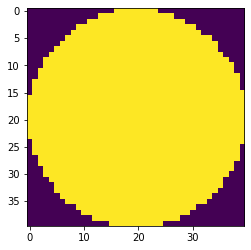

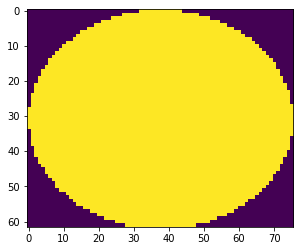

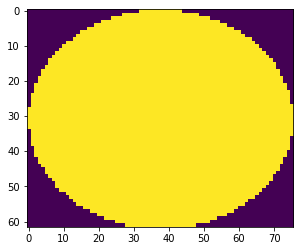

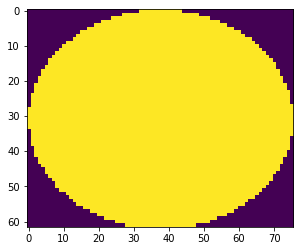

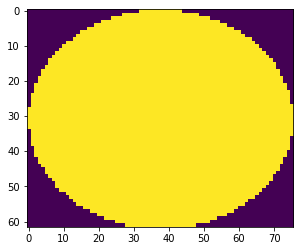

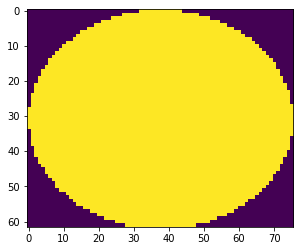

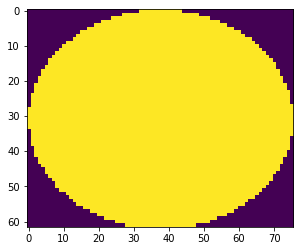

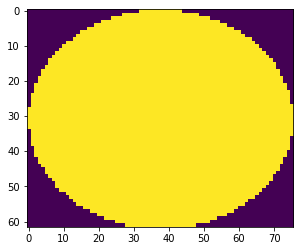

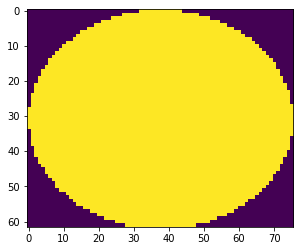

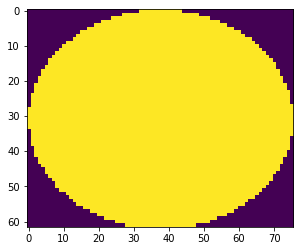

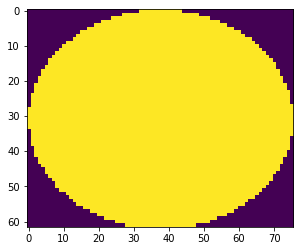

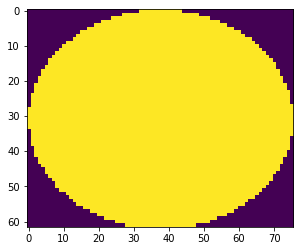

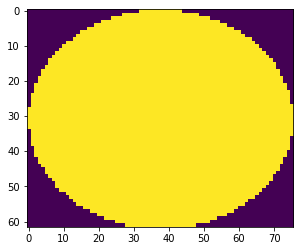

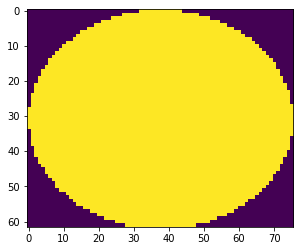

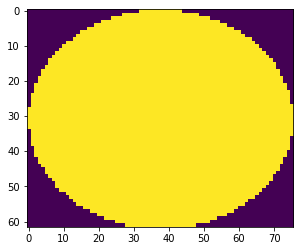

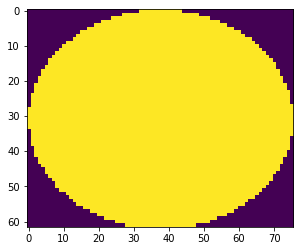

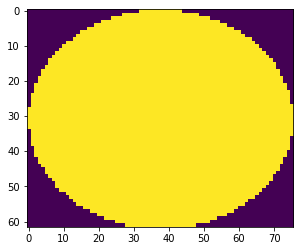

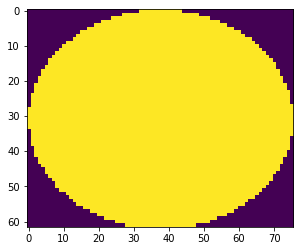

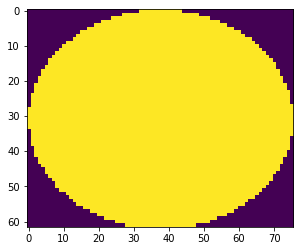

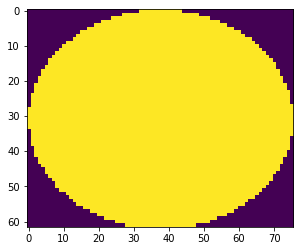

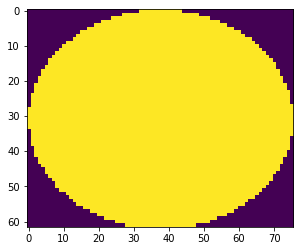

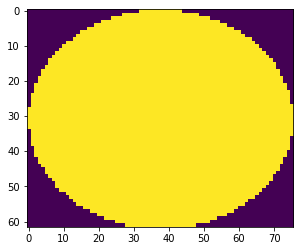

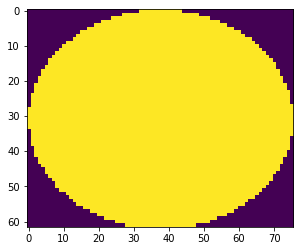

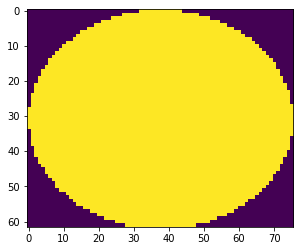

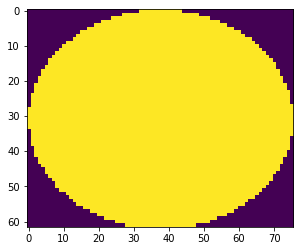

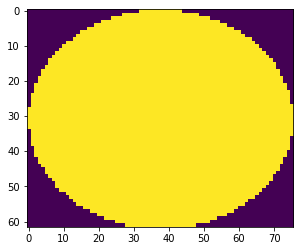

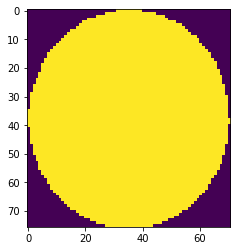

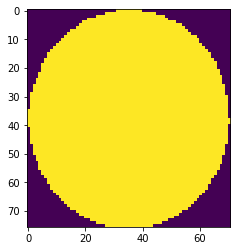

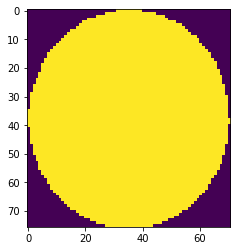

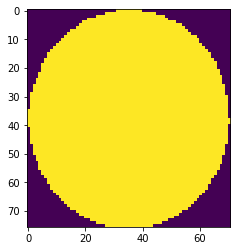

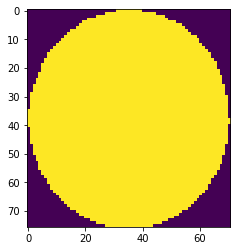

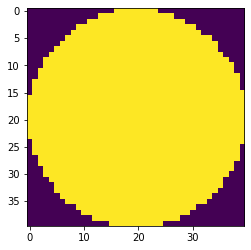

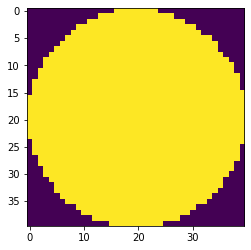

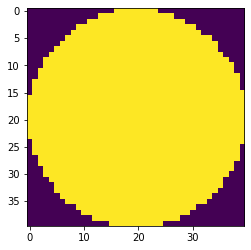

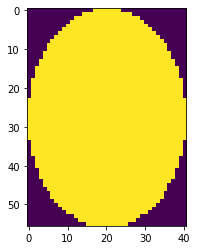

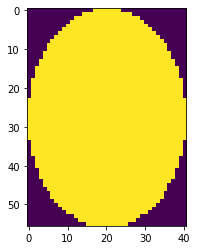

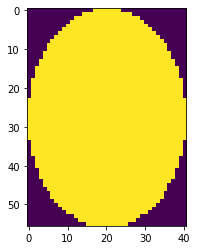

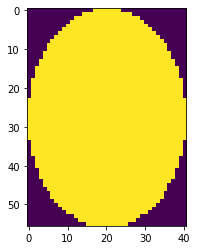

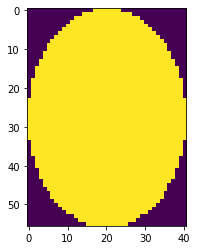

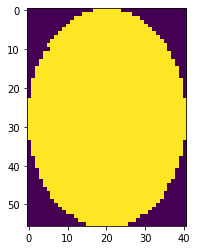

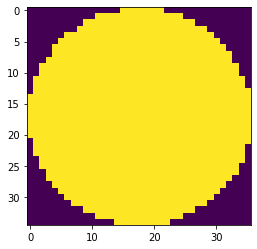

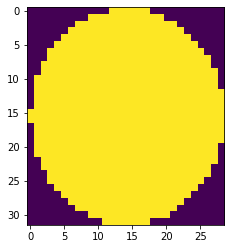

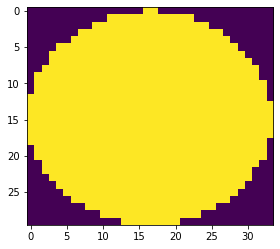

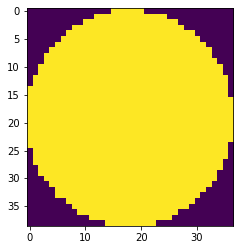

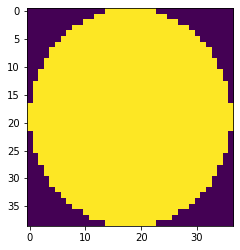

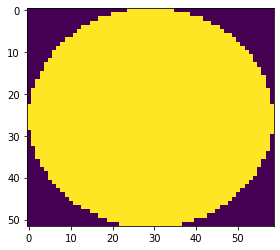

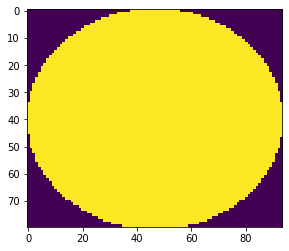

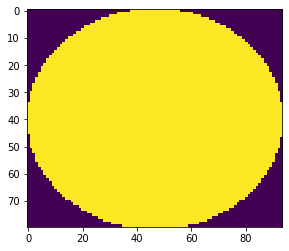

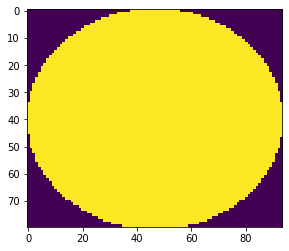

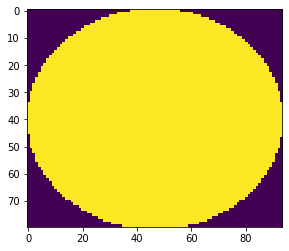

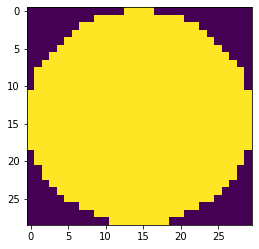

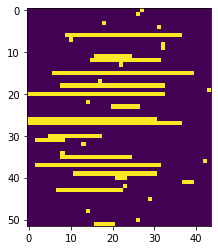

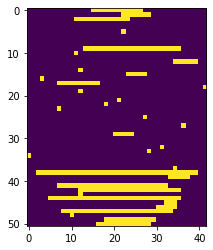

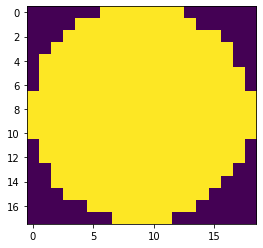

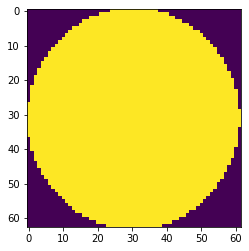

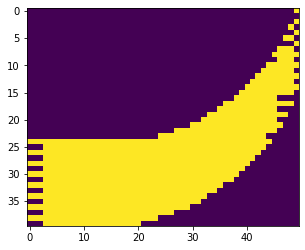

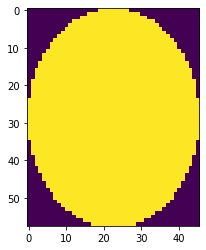

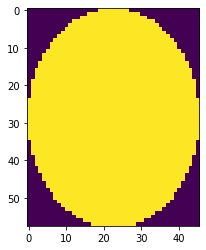

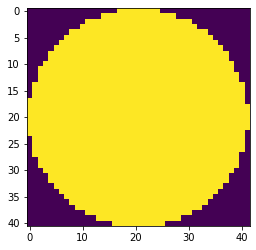

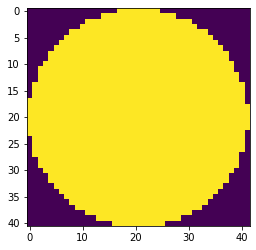

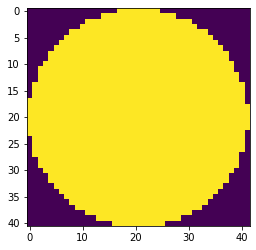

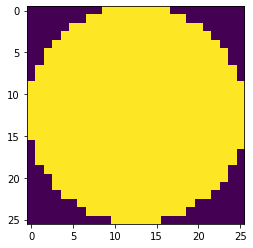

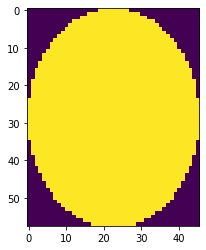

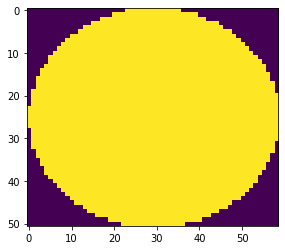

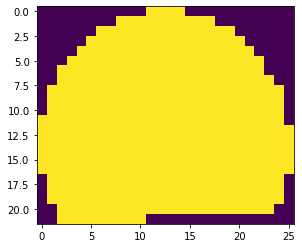

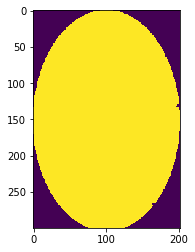

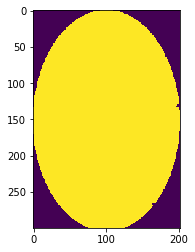

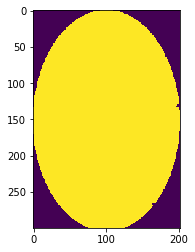

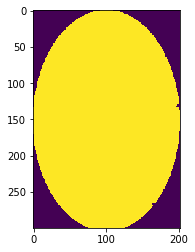

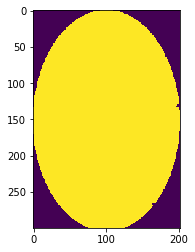

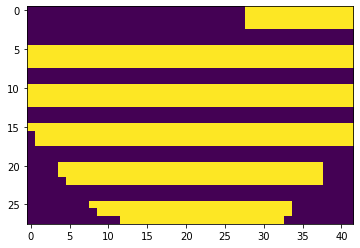

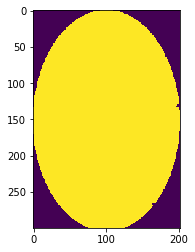

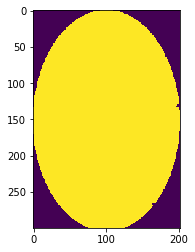

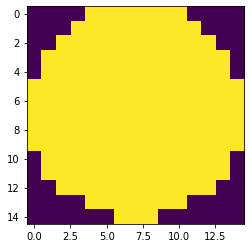

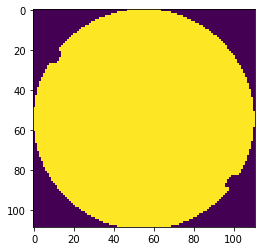

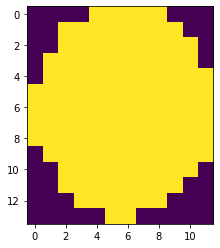

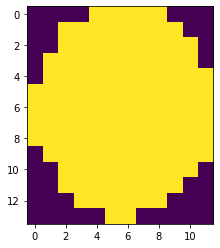

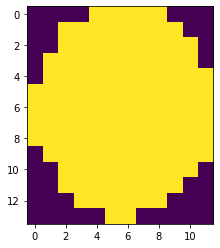

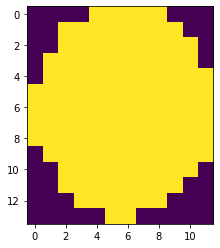

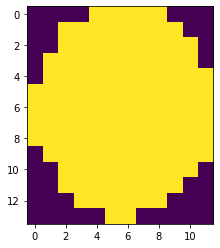

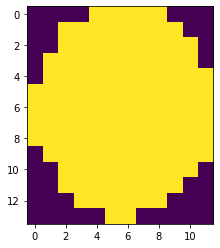

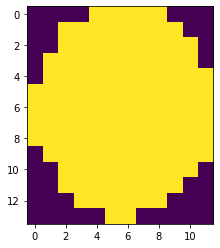

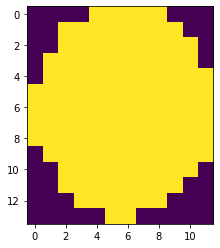

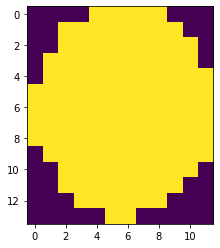

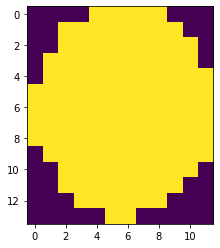

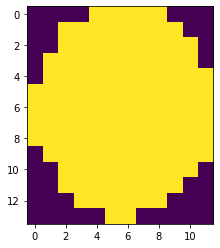

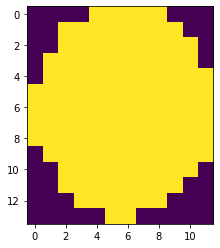

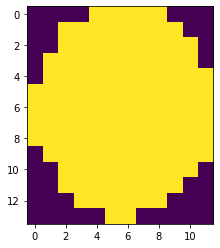

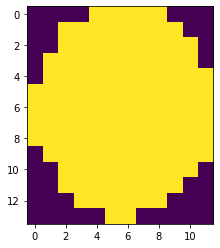

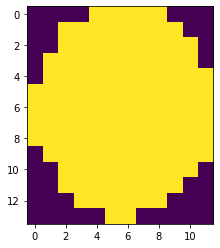

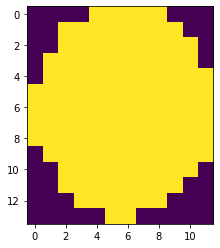

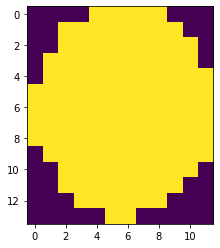

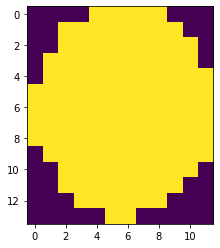

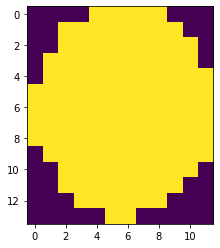

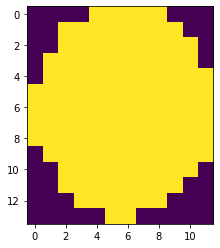

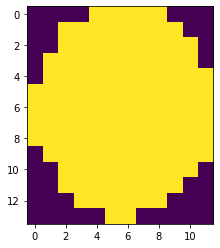

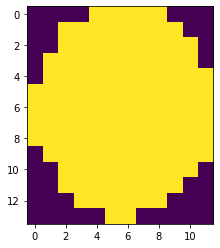

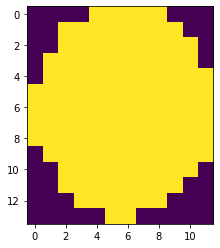

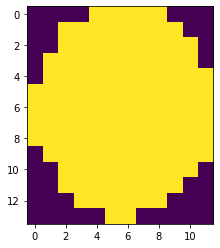

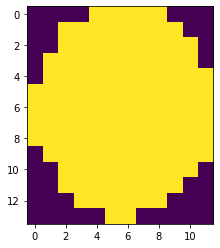

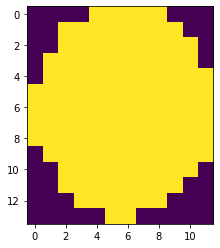

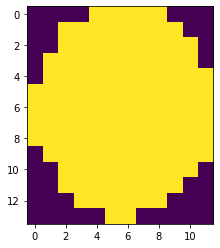

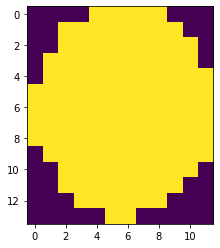

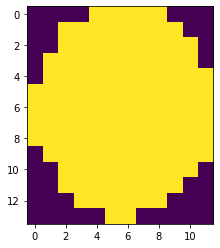

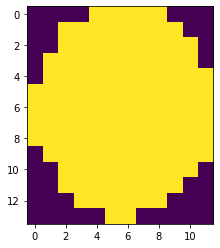

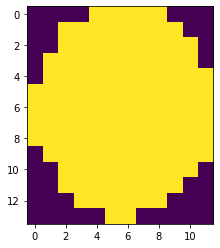

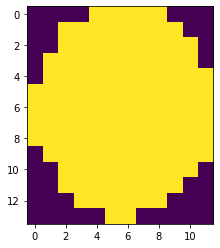

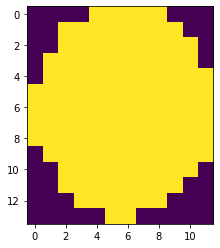

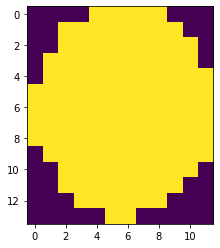

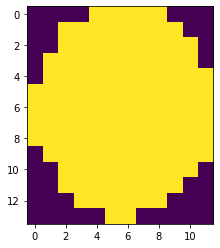

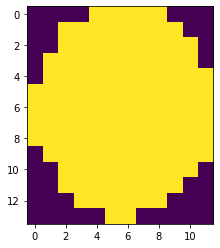

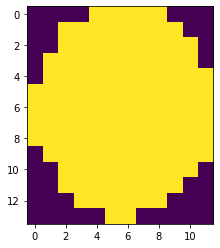

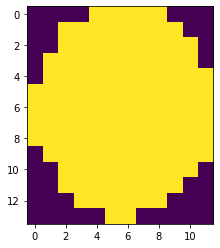

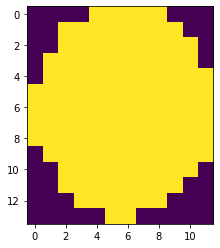

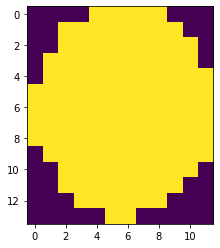

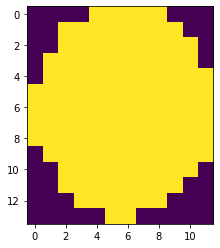

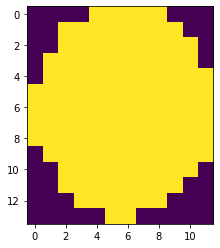

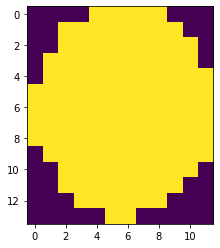

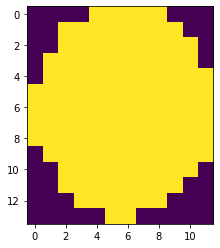

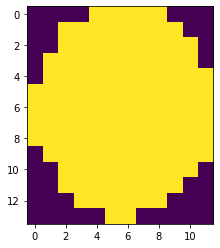

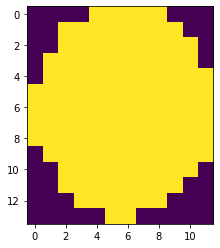

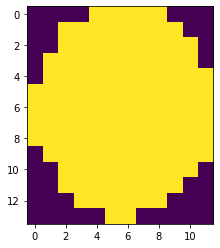

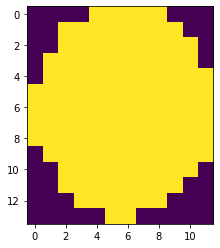

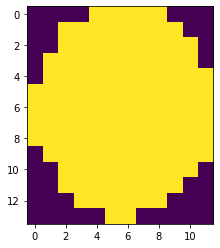

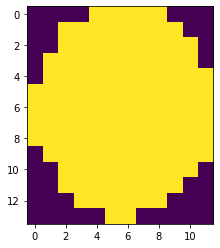

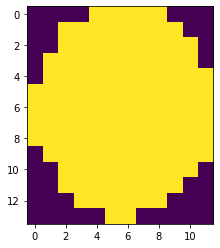

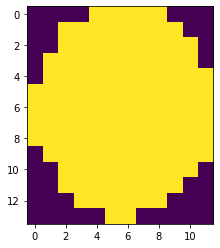

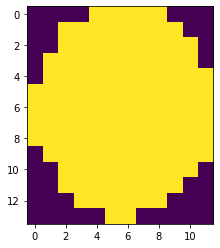

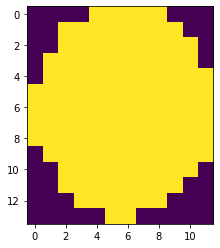

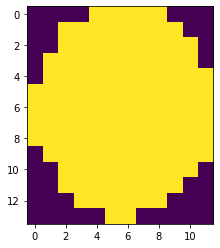

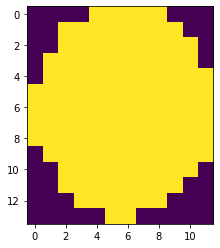

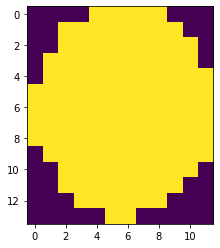

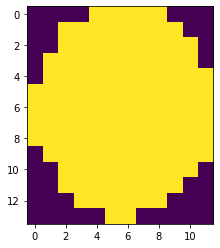

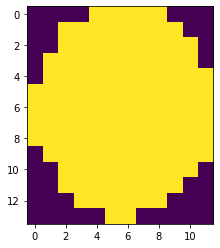

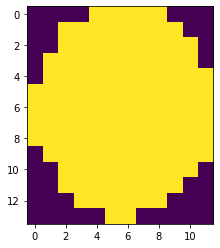

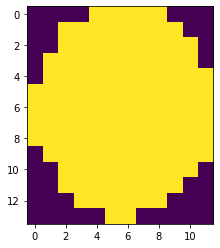

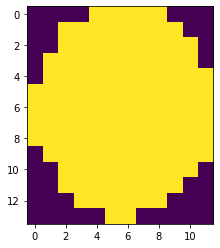

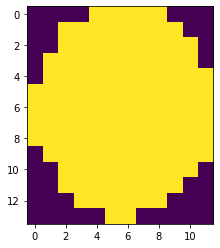

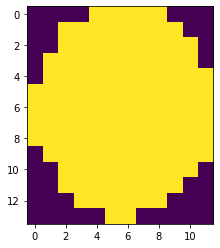

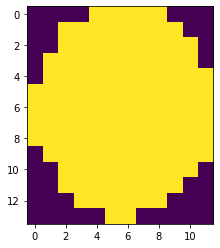

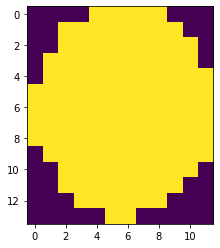

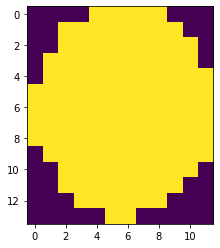

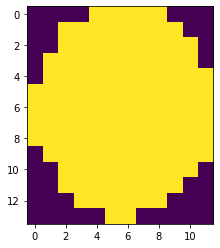

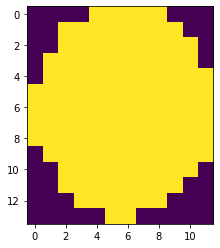

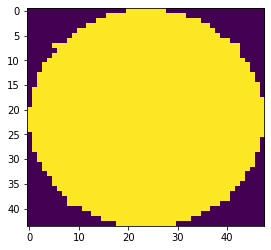

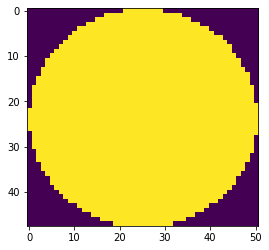

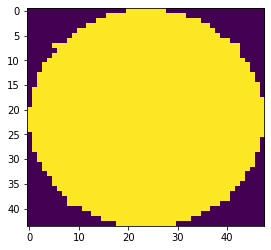

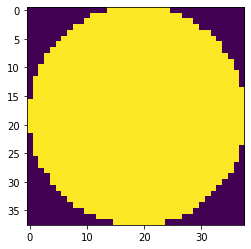

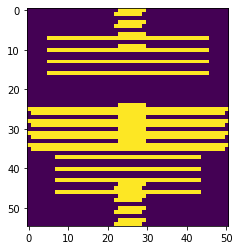

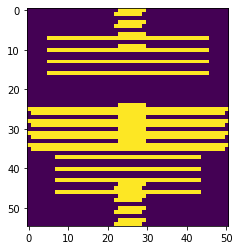

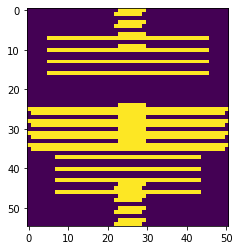

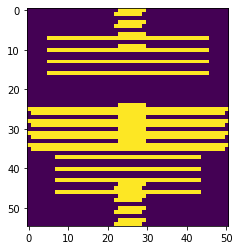

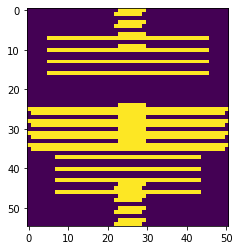

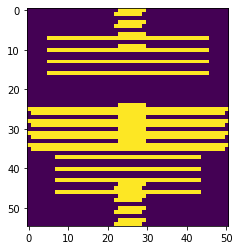

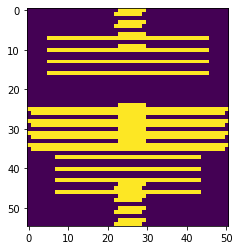

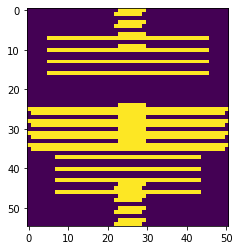

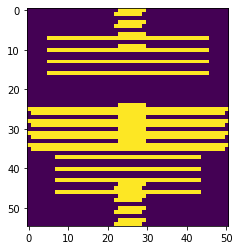

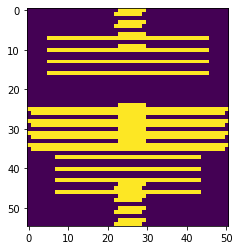

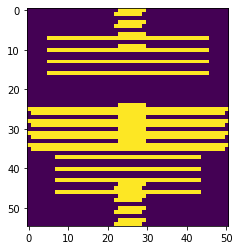

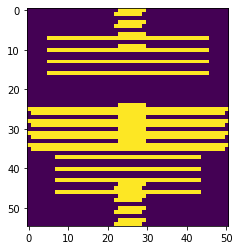

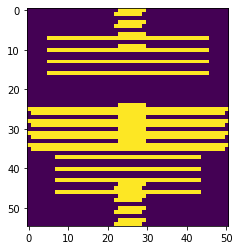

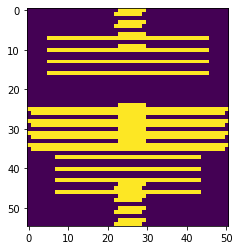

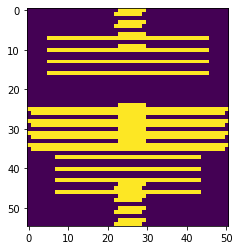

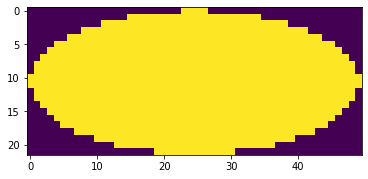

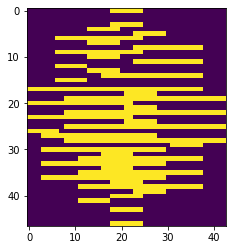

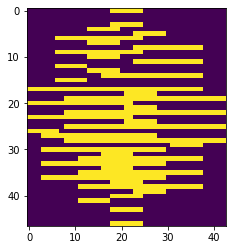

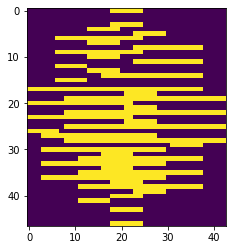

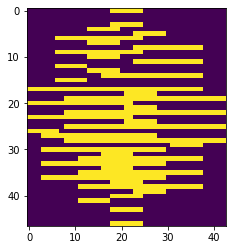

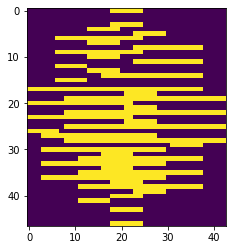

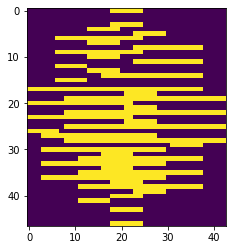

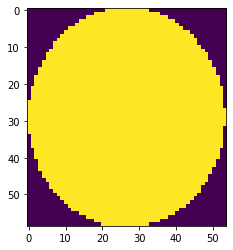

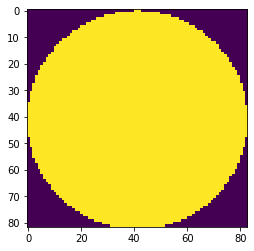

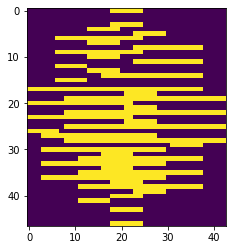

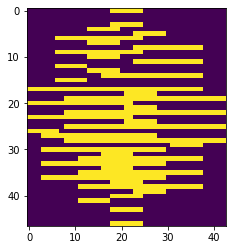

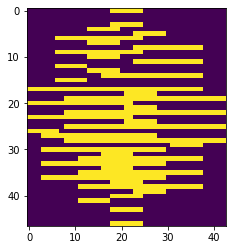

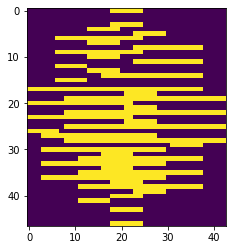

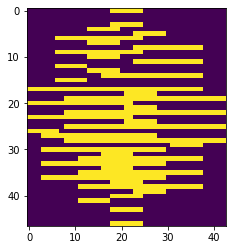

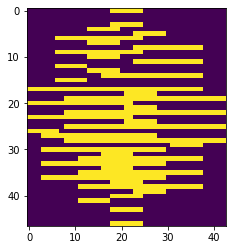

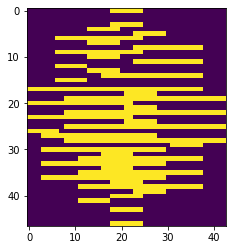

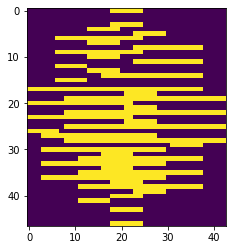

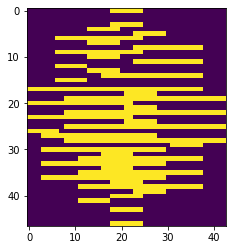

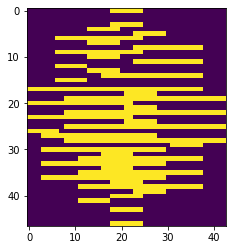

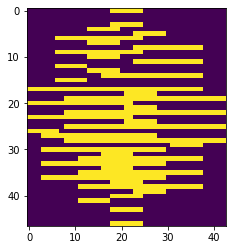

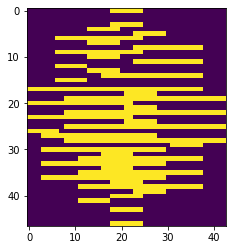

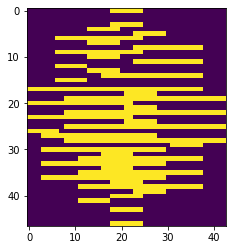

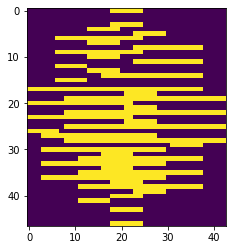

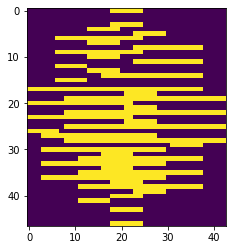

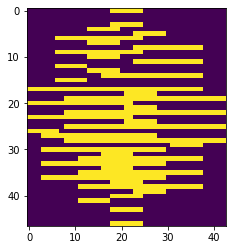

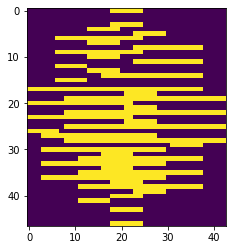

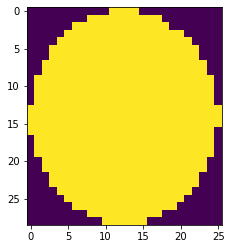

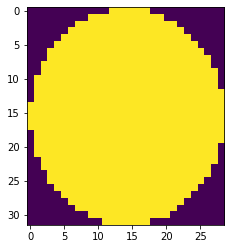

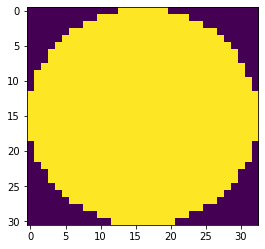

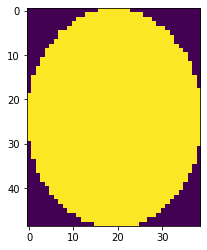

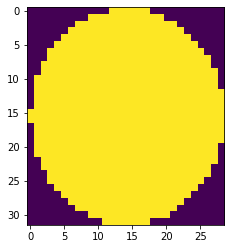

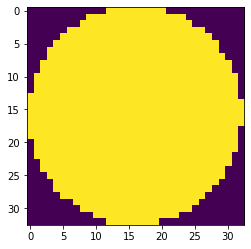

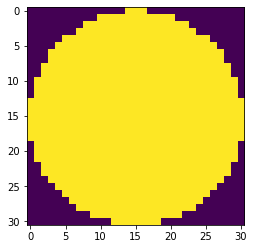

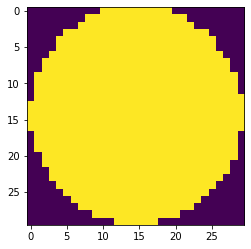

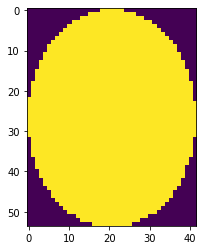

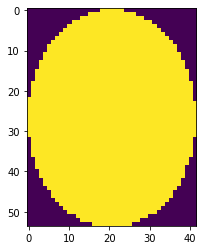

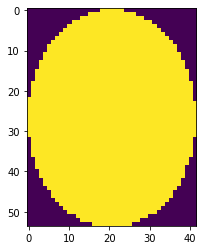

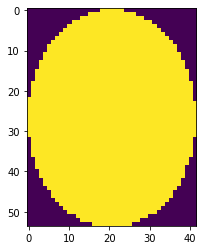

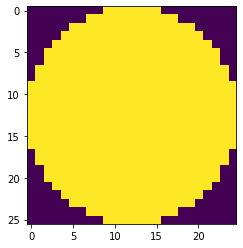

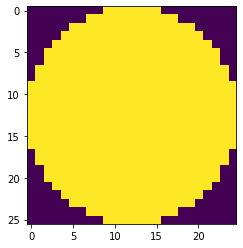

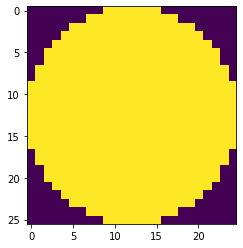

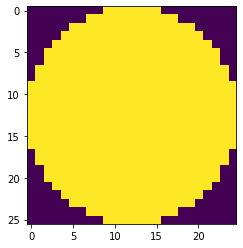

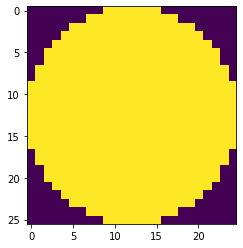

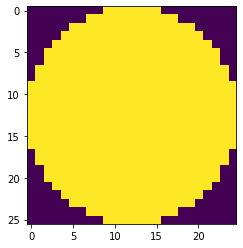

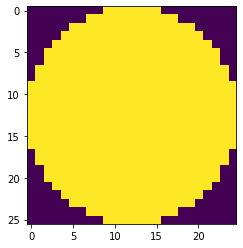

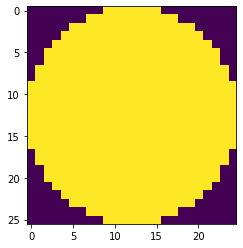

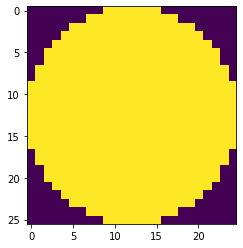

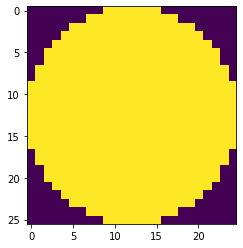

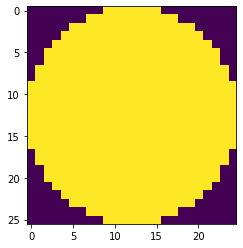

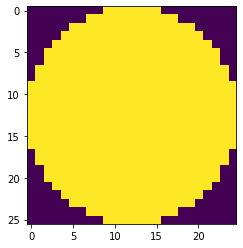

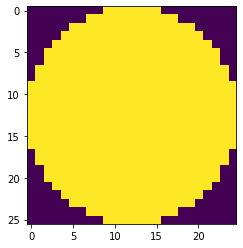

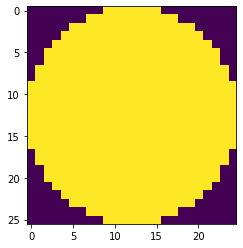

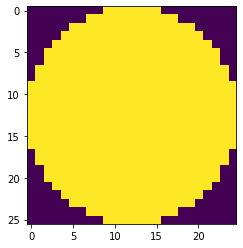

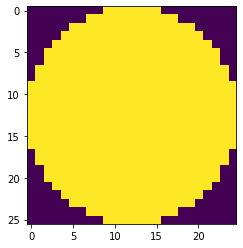

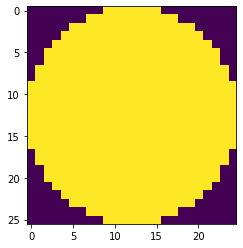

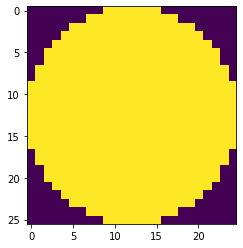

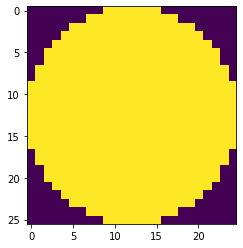

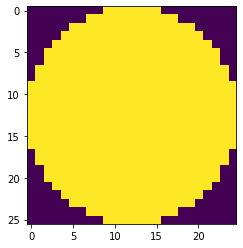

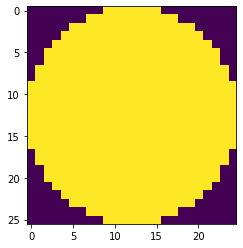

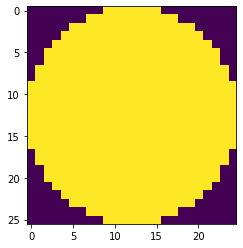

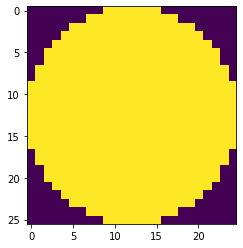

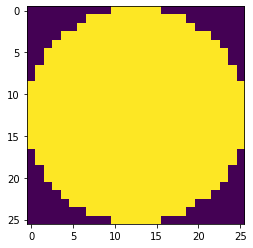

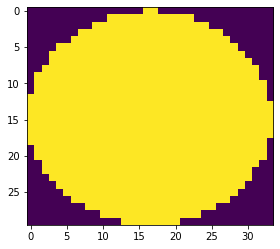

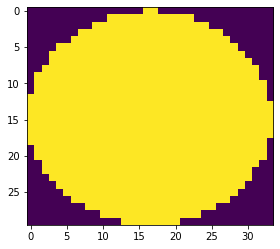

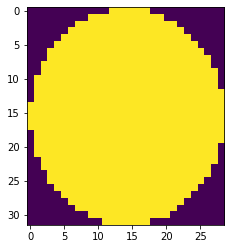

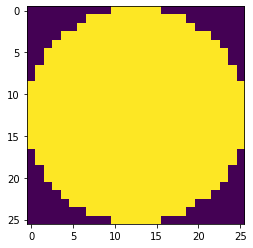

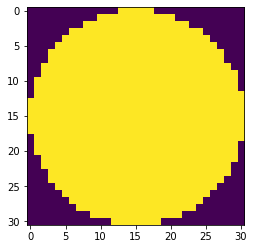

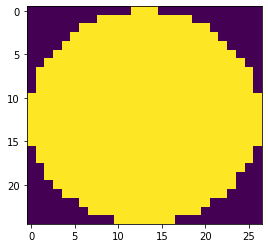

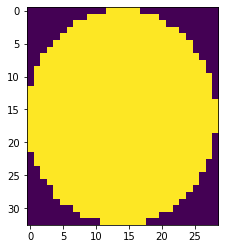

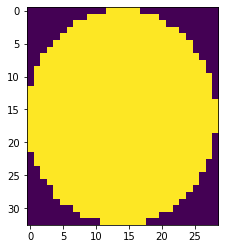

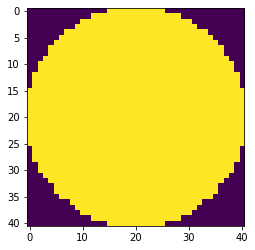

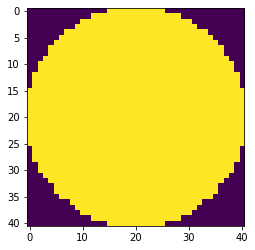

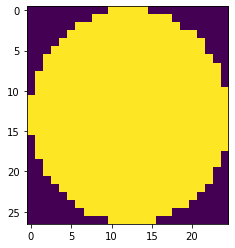

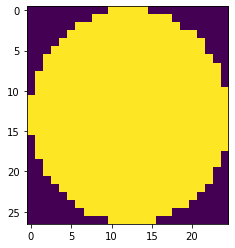

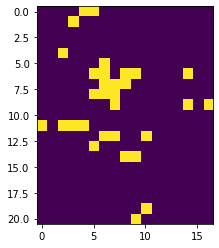

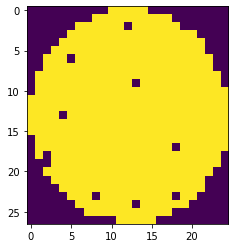

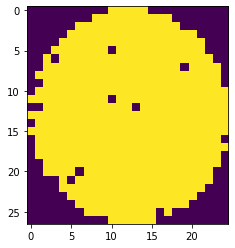

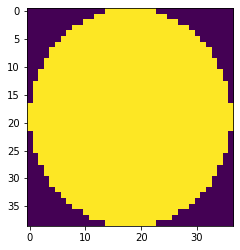

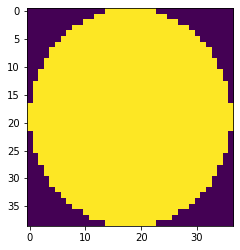

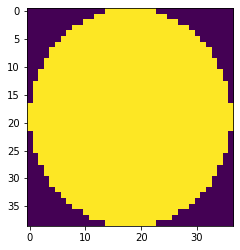

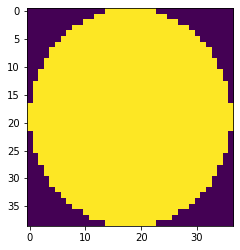

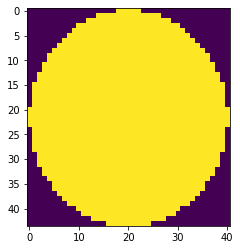

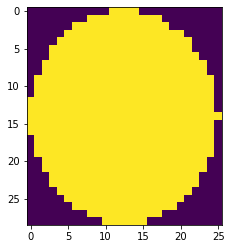

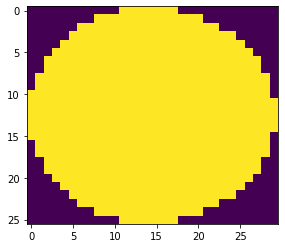

In [14]:
# outlier image 확인
for i in range(len(outlier_idx)):
    plt.figure()
    plt.imshow(df.waferMap[outlier_idx[i]])

In [15]:
## outlier 제거
df2 = df.drop(outlier_idx, axis=0)

In [16]:
## outlier 제거 후labeling 여부
N_labled = 0
for i in range(len(df2.failureType)):
    if i not in outlier_idx:
        if len(df2.failureType[i]) != 0: # labeled
            N_labled += 1
    else:
        pass

# labeled 비율
print('N of labeled = ', N_labled, '  label 비율 = ', N_labled/len(df2.failureType)*100, '%')
print('N of unlabeled = ', len(df2.failureType)-N_labled, '  unlabel 비율 = ', 100-N_labled/len(df2.failureType)*100, '%')

N of labeled =  172603   label 비율 =  21.279641186609098 %
N of unlabeled =  638515   unlabel 비율 =  78.7203588133909 %


# Task 1: 불량 패턴 및 Lot과의 관계 파악

In [17]:
## failure type 당 갯수
print('Failure Type')
for i in range(len(failureType)):
    print(failureType[i], ': ', (df2.failureType == failureType[i]).sum())

Failure Type
Center :  4294
Donut :  555
Edge-Loc :  5189
Edge-Ring :  9680
Loc :  3593
Near-full :  135
Random :  866
Scratch :  1193


In [18]:
# lot의 종류 개수
len(np.unique(df.lotName))

46293

In [19]:
## label된 데이터 index만 추출하기
labeled_idx = []
for i in range(len(df2.failureType)):
    if i not in outlier_idx:
        if i%100000==0:
            print(i, sep=' ')
        if len(df2.failureType[i]) != 0:
            labeled_idx.append(i)

0
100000
200000
300000
400000
500000
600000
700000
800000


In [20]:
## 불량을 포함한 lot
failed_lot = []
for i in labeled_idx:
    if df2.failureType[i] != 'none':
        failed_lot.append(df2.lotName[i])        

In [21]:
len(np.unique(failed_lot))

8029

In [22]:
# failure 비율
len(failed_lot)/N_labled

0.14737287300915974

In [23]:
df.failureType[(df.failureType == 'Center')]

44        [[Center]]
49        [[Center]]
604       [[Center]]
729       [[Center]]
893       [[Center]]
             ...    
810049    [[Center]]
810087    [[Center]]
810308    [[Center]]
810604    [[Center]]
811440    [[Center]]
Name: failureType, Length: 4294, dtype: object

In [24]:
df.failureType[(df.failureType == 'Center')].index

Int64Index([    44,     49,    604,    729,    893,   2603,   3837,   4419,
              4890,   5336,
            ...
            809555, 809701, 809773, 809992, 810003, 810049, 810087, 810308,
            810604, 811440],
           dtype='int64', length=4294)

# Task 2: 불량 패턴 분류

In [25]:
## label된 데이터만 추출하기
X = []
y = []
for i in range(len(df2.failureType)):
    if i not in outlier_idx:
        if i%100000==0:
            print(i, sep=' ')
        if len(df2.failureType[i]) != 0: # label된 이미지
            X.append(df2.waferMap[i])
            y.append(df2.failureType[i][0][0])       


0
100000
200000
300000
400000
500000
600000
700000
800000


In [26]:
## image resize
# label된 data만 resize
import skimage

t = time.time()
X_resized = [skimage.transform.resize(image, (100, 100)) for image in X]
time.time()-t

# waferMap_resized = []
# n = 0
# for image in df.waferMap:
#     n += 1
#     waferMap_resized.append(skimage.transform.resize(image, (100, 100)))
#     if n%10000 == 0:
#         print(n)

199.10838389396667

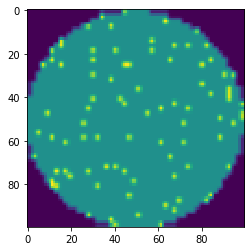

In [68]:
plt.imshow(X_resized[0])

In [75]:
X = np.array(X_resized)
y = np.array(y)

In [76]:
np.unique(y)

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch', 'none'], dtype='<U9')

In [77]:
# 불량 타입을 one-hot encoding으로 표시
y_onehot = np.asarray(pd.get_dummies(y, columns=np.unique(y)))

In [78]:
len(y_onehot)

172603

In [79]:
## training/test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=1008, stratify=y) #  class 비율에 맞게 split

In [73]:
import tensorflow.keras as keras

from tensorflow.keras import layers       # model
from tensorflow.keras import models
from tensorflow.keras import losses       # loss
from tensorflow.keras import optimizers   # optimizer
# from tensorflow.keras import callbacks    # callback
# from keras import regularizers

In [80]:
# data reshaping
X_train = X_train.reshape(len(X_train), 100, 100, 1)
X_test = X_test.reshape(len(X_test), 100, 100, 1)

In [81]:
## building CNN network

model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(100,100,1))) 
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))


model.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,  batch_size=100)

W1113 23:36:39.204472 140194919790336 deprecation.py:506] From /home/ds4user10/.local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
138082/138082 [==============================] - 28s 204us/sample - loss: 0.2948 - acc: 0.9291
Epoch 2/10
138082/138082 [==============================] - 26s 189us/sample - loss: 0.2248 - acc: 0.9417
Epoch 3/10
  8500/138082 [>.............................] - ETA: 24s - loss: 0.2238 - acc: 0.9414

KeyboardInterrupt: 

In [197]:
test_losss, test_acc = model.evaluate(X_test, y_test)

34590/34590 [==============================] - 4s 127us/sample - loss: 5.6371 - acc: 0.8572


In [198]:
test_acc

0.8572131

In [166]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 16)      80        
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 40000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               10240256  
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)             

In [199]:
a = model.predict(X_test)

In [211]:
a[2000]

array([2.2722051e-29, 0.0000000e+00, 8.6234290e-15, 2.7542482e-30,
       1.0066403e-06, 0.0000000e+00, 0.0000000e+00, 2.4118842e-30,
       9.9999905e-01], dtype=float32)

In [203]:
y[43]

'Center'

# Task 3: 레이블 없는 데이터